# Street Easy Linear Regression project
### StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

### In this project i will analyse:
- “Does having a washer/dryer in unit increase the price of rent?”
- “How costly is living by a subway station in Brooklyn/Queens?”
- “Is a tenant over or underpaying?”
- Create a Linear Regression model to predict the rent for the futures real states


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')

In [3]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


Have washer dryer average: 5253.503736920778
Have washer dryer median: 4100.0
Dont have washer dryer average: 4426.231817132302
Dont have washer dryer median: 3500.0
The houses that have the washer dryer are: 18.69 % more expensives


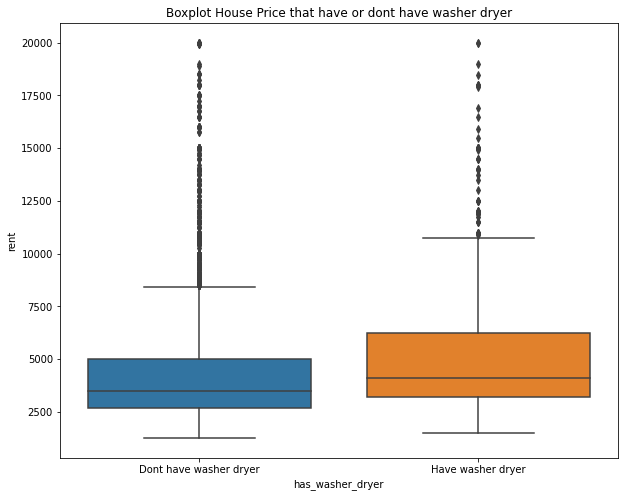

<Figure size 432x288 with 0 Axes>

In [4]:
#first i will look at the average and median for the houses that have the washer dish
rent_price_washer = df[df.has_washer_dryer == 1]
rent_washer = df['rent'][df.has_washer_dryer == 1]
# print(rent_washer)

rent_washer_average = np.mean(rent_washer)
rent_washer_median = np.median(rent_washer)

print('Have washer dryer average:', rent_washer_average)
print('Have washer dryer median:', rent_washer_median)

#now i will look at the houses that dont have
rent_price_no_washer = df[df.has_washer_dryer == 0]
rent_no_washer = df['rent'][df.has_washer_dryer == 0]

rent_no_washer_average = np.mean(rent_no_washer)
rent_no_washer_median = np.median(rent_no_washer)

print('Dont have washer dryer average:', rent_no_washer_average)
print('Dont have washer dryer median:', rent_no_washer_median)

percentage_have_dishwasher = (rent_washer_average/rent_no_washer_average)-1
print('The houses that have the washer dryer are: {} % more expensives'.format(round(percentage_have_dishwasher*100, 2)) )

# now i will plot a boxplot to see the difference btw these 2
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='has_washer_dryer', y='rent')
ax.set_xticklabels(['Dont have washer dryer', 'Have washer dryer'])
plt.title('Boxplot House Price that have or dont have washer dryer')
plt.show()
plt.clf()

The average rent to live by a subway in Brooklyn is: 3353.32 dollars
The average rent to live by a subway in Queens is: 2572.68 dollars
The average rent to live by a subway in Brooklyn/Queens is: 3131.51 dollars


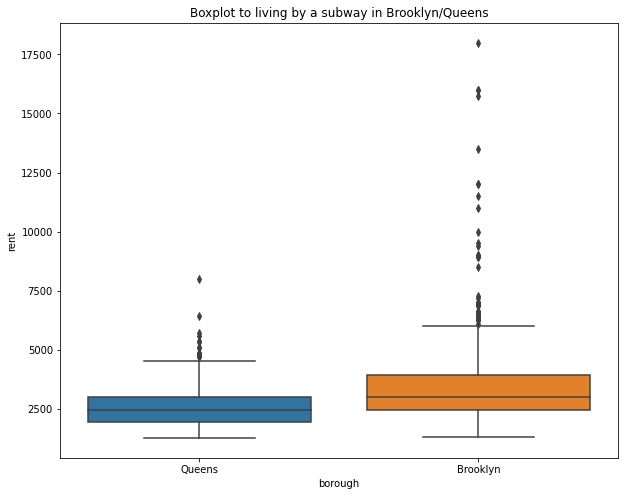

<Figure size 432x288 with 0 Axes>

In [32]:
# “How costly is living by a subway station in Brooklyn/Queens?”
subway_BQ = df[['rent', 'borough', 'min_to_subway']]
# print(subway_BQ.head(20))

bq = subway_BQ[(subway_BQ.borough == 'Brooklyn') | (subway_BQ.borough == 'Queens')]
# print(bq)

rent_by_subway = bq.rent[bq.min_to_subway <= 10]
# print(rent_by_subway)

average_brooklyn_subway = np.mean(bq.rent[(bq.borough == 'Brooklyn') & (bq.min_to_subway <= 10)])
average_queens_subway = np.mean(bq.rent[(bq.borough == 'Queens') & (bq.min_to_subway <= 10)])
average_rent_by_subway = np.mean(rent_by_subway)

print('The average rent to live by a subway in Brooklyn is: {} dollars'.format(round(average_brooklyn_subway, 2)))
print('The average rent to live by a subway in Queens is: {} dollars'.format(round(average_queens_subway, 2)))
print('The average rent to live by a subway in Brooklyn/Queens is: {} dollars'.format(round(average_rent_by_subway, 2)))

# ploting a boxplot to see better the numbers
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=bq[bq.min_to_subway <= 10], x='borough', y='rent')
plt.title('Boxplot to living by a subway in Brooklyn/Queens')
plt.show()
plt.clf()

In [6]:
# prediction model to rent
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# Add the code here:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
predict = mlr.predict(sonny_apartment)
print("Predicted rent: $%.2f" % predict, '\n')

print('The MLR coefficients are:','\n' , mlr.coef_)

Predicted rent: $2258.75 

The MLR coefficients are: 
 [[-461.17539618 1278.6000335     4.81900428  -14.94950189   38.70966963
    -4.52297793  -90.26769009   90.64556132  196.97409914  -41.5462096
   224.20724181    9.0336051    24.12310573  -86.37764952]]


C:\Users\iury_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### As we can see, the coefficient that most influences the rental values is the number of bathrooms and second the number of bedrooms

Now lets plot a scatter graph to see if the actual prices fit with the predicted prices calculate by the model

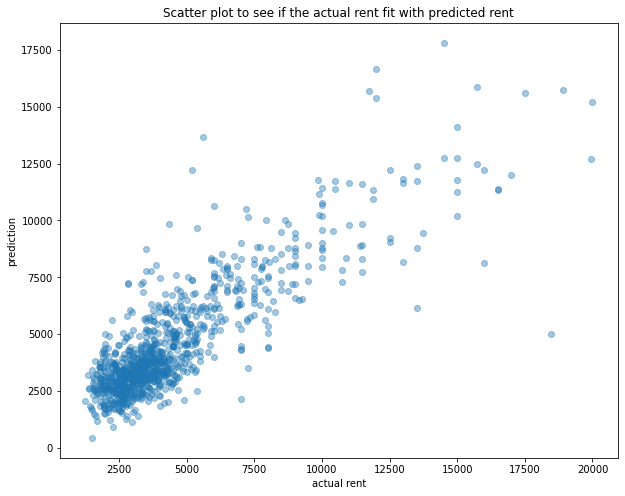

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('actual rent')
plt.ylabel('prediction')
plt.title('Scatter plot to see if the actual rent fit with predicted rent')
plt.show()
plt.clf()

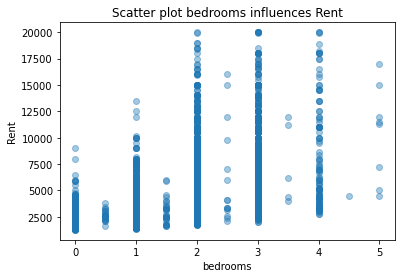

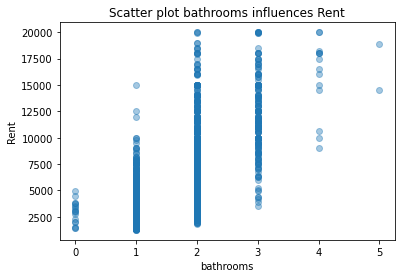

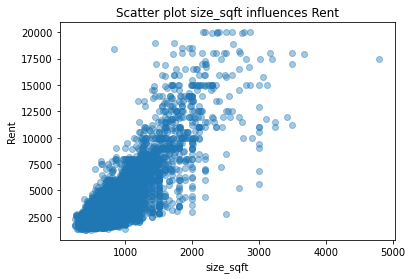

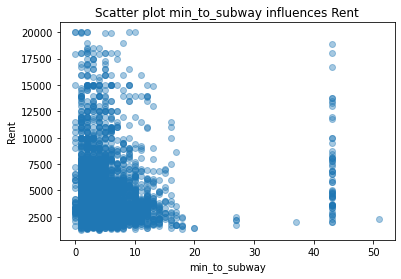

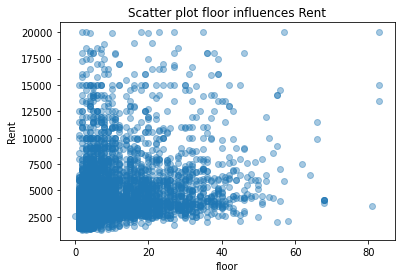

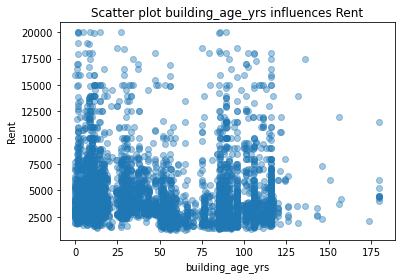

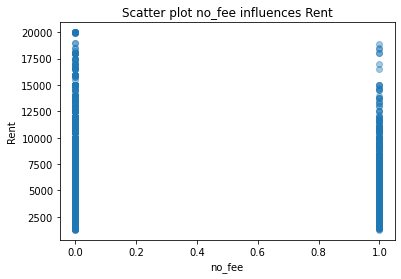

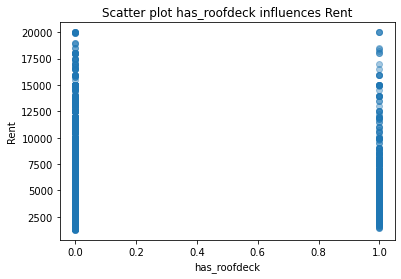

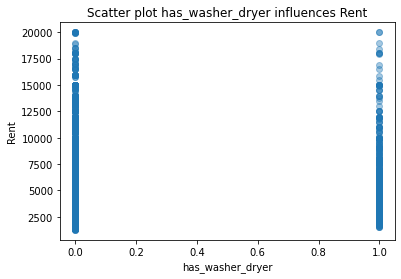

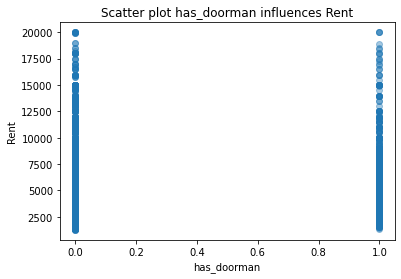

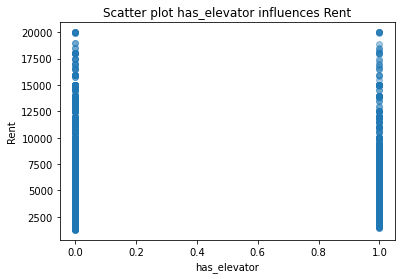

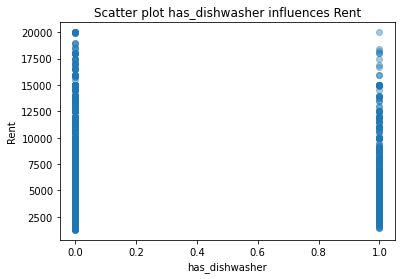

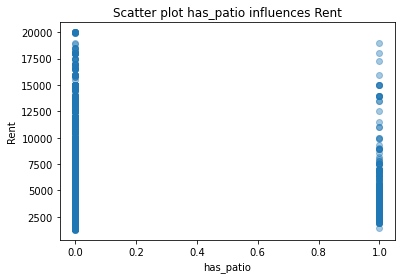

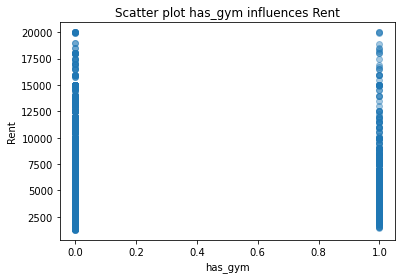

<Figure size 432x288 with 0 Axes>

In [8]:
# creating graphs of all variables to see what variable have the stronger correlation with our prediction model
def create_scatter (x):
    plt.scatter(df[[x]], df[['rent']], alpha=0.4)
    plt.xlabel(x)
    plt.ylabel('Rent')
    plt.title('Scatter plot {} influences Rent'.format(x))
    plt.show()
    plt.clf()

for i in x:
    create_scatter(i)
    

Train score:
0.7349688159822418 

The mean squared error regression loss for the testing set is:
0.7158565217228201


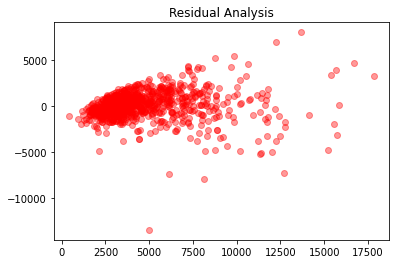

<Figure size 432x288 with 0 Axes>

In [9]:
print('Train score:')
print(mlr.score(x_train, y_train), '\n')
#this means that we have 73% of acuracy about the variation price 

print('The mean squared error regression loss for the testing set is:')
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4, color='red')
plt.title('Residual Analysis')
plt.show()
plt.clf()

## With this model we can offer to a real state company a model to suggest to the houses and apartment owners the rental price for that property

### “Is a tenant over or underpaying?”
- to see the answer of this question we need to get the information about the property and put on the function to see if the predicted value fit with the actual rent value

In [34]:
# Here is some example to how this model works

zoe_apartment = [[1, 1, 620, 16, 1, 98, 0, 0, 1, 0, 0, 0, 1, 0]]
predict = mlr.predict(zoe_apartment)
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2339.99


C:\Users\iury_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
